# Performance Comparison

This notebook is to compare the kmeans between my implemetation and Scikit-learn.

## Preprocessing
Again, I put the Chicago taxi and it's Pickup coordinates into this comparison. To speed up the analysis, it is sampled to 2,000 rows.

In [1]:
import pandas as pd
df = pd.read_csv('chicago_taxi.csv')
pickup_coordinates_df = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna()
sampled_df = pickup_coordinates_df.sample(2000)
X = sampled_df.to_numpy() # For sklearn.KMeans
input_X = X.tolist() # For My KMeans
X 

array([[ 41.87400538, -87.66351755],
       [ 41.89960211, -87.63330804],
       [ 41.85934972, -87.61735801],
       ...,
       [ 41.88099447, -87.63274649],
       [ 41.88498719, -87.62099291],
       [ 41.87925508, -87.642649  ]])

## My KMeans

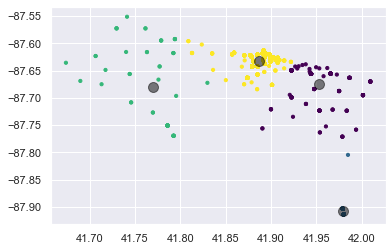

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from kmeans import KMeans as MyKMeans

mykmean = MyKMeans(k=4, max_iterations=100)
(groups, centroids) = mykmean.fit_extended(input_X, False)

centers = np.array(centroids)
group =  np.array(groups)

plt.scatter(X[:, 0], X[:, 1], c=group, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

## Sklearn - KMeans

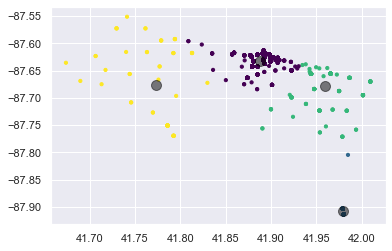

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clustering = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering, s=10, cmap='viridis')
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)